# Exercício 5

Considerando a barra do exercício anterior com a carga $P$ aplicada na sua extremidade livre, com $EA$ igual a deste exercício, utilizando-se uma divisão com 7 elementos finitos com aproximações lineares, cada um com um comprimento diferente denominados por $h_1$ a $h_7$, sendo $h_1 = \frac{l}{10}$ e $h_i = h_1 + \frac{i*l}{70}$ para $i = 2$ a $7$ pede-se montar a matriz de rigidez global para a numeração conforme indicado abaixo.
Cada aluno deve adotar uma numeração dos nós dependente do valor de N, associado conforme a tabela fornecida em função do seu número de ordem na lista de chamada. Determine também a matriz de rigidez para uma numeração sequencial dos nós da malha.

1 - Apresente as matrizes de cada elemento para o valor de N associado ao seu caso.

2 - Apresente a matriz de conectividade adotada para a numeração escolhida

3 - Apresente as matrizes globais resultante da composição das matrizes individuais

4 - Apresente a solução obtida e compare graficamente com a solução exata do problema


## Resolução

### Equação do Problema

Temos que o problema é descrito pela equação:

$$
EA \frac{d^2 u(x)}{dx^2} = P \delta(x - a), 0 \leq x \leq L
$$

onde $a = L$.

### Numeração dos nós

A numeração para $N = 0$ será:

$$
\begin{bmatrix}
1 & 3 & 5 & 7 & 2 & 6 & 4
\end{bmatrix}
$$

### Cáculo dos comprimentos dos elementos

Consideraremos o  parâmetro $l = 20$ para o cálculo do tamanho dos elementos:

In [2]:
import sympy as sp

h1, h2, h3, h4, h5, h6, h7 = sp.symbols('h_1 h_2 h_3 h_4 h_5 h_6 h_7')

l = 20

hi = [h1, h2, h3, h4, h5, h6, h7]
hl = [l/10]
display(sp.Eq(hi[0], hl[0]))

for i in range(1,7):
    hl.append(hl[0] + (i*l)/70)
    display(sp.Eq(hi[i], hl[i]))



Eq(h_1, 2.0)

Eq(h_2, 2.28571428571429)

Eq(h_3, 2.57142857142857)

Eq(h_4, 2.85714285714286)

Eq(h_5, 3.14285714285714)

Eq(h_6, 3.42857142857143)

Eq(h_7, 3.71428571428571)

### 1- Matrizes de cada elemento

In [4]:
EA, x, h, k1, k2, k3, k4, k5, k6, k7 = sp.symbols('EA x h k_1 k_2 k_3 k_4 k_5 k_6 k_7')

phi_1 = 1 - x/h
phi_2 = x/h

k = EA * sp.Matrix([
    [
        sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_1, x), (x, 0, h)), 
        sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_2, x), (x, 0, h))
    ], 
    [
        sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_1, x), (x, 0, h)), 
        sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_2, x), (x, 0, h))
    ]
])
display(EA/h, k.subs({EA: 1, h: 1}))

EA/h

Matrix([
[ 1, -1],
[-1,  1]])

#### $k_1$

In [5]:
k1 = k.subs({h: hl[0]})
display(k1)

Matrix([
[ 0.5*EA, -0.5*EA],
[-0.5*EA,  0.5*EA]])

#### $k_2$

In [6]:
k2 = k.subs({h: hl[1]})
display(k2)

Matrix([
[ 0.4375*EA, -0.4375*EA],
[-0.4375*EA,  0.4375*EA]])

#### $k_3$

In [7]:
k3 = k.subs({h: hl[2]})
display(k3)

Matrix([
[ 0.388888888888889*EA, -0.388888888888889*EA],
[-0.388888888888889*EA,  0.388888888888889*EA]])

#### $k_4$

In [8]:
k4 = k.subs({h: hl[3]})
display(k4)

Matrix([
[ 0.35*EA, -0.35*EA],
[-0.35*EA,  0.35*EA]])

#### $k_5$

In [9]:
k5 = k.subs({h: hl[4]})
display(k5)

Matrix([
[ 0.318181818181818*EA, -0.318181818181818*EA],
[-0.318181818181818*EA,  0.318181818181818*EA]])

#### $k_6$

In [10]:
k6 = k.subs({h: hl[5]})
display(k6)

Matrix([
[ 0.291666666666667*EA, -0.291666666666667*EA],
[-0.291666666666667*EA,  0.291666666666667*EA]])

#### $k_7$

In [27]:
k7 = EA * sp.Matrix([
    [sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_1, x), (x, 0, h)), sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_2, x), (x, 0, h))], 
    [sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_1, x), (x, 0, h)), sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_2, x), (x, 0, h))]
]).subs({h: hl[6]})
display(k7)

Matrix([
[ 0.269230769230769*EA, -0.269230769230769*EA],
[-0.269230769230769*EA,  0.269230769230769*EA]])

### 2- Matriz de conectividade 

In [22]:
C = sp.Matrix([
[1, 3],
[3, 5],
[5, 7],
[7, 2],
[2, 6],
[6, 4],
[4, 8],
])
display(C)

Matrix([
[1, 3],
[3, 5],
[5, 7],
[7, 2],
[2, 6],
[6, 4],
[4, 8]])

**Malha com índices dos nós e elementos**

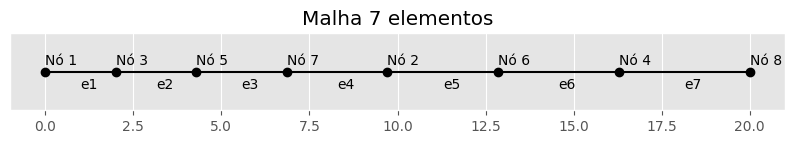

In [51]:
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.figure(figsize=(10,1))

n_elementos = len(C[:,0])
n_nos = n_elementos + 1

h_acumulado = np.concatenate(([0], np.cumsum(hl)))

plt.plot(h_acumulado, [0 for i in range(n_nos)], '-o', color='black')

for i in range(n_nos - 1):
    plt.annotate(f'Nó {C[i,0]}', (h_acumulado[i],0.01))
    plt.annotate(f'e{i+1}', ((h_acumulado[i] + (h_acumulado[i+1] - h_acumulado[i])/2),-0.025))
plt.annotate(f'Nó 8', (h_acumulado[-1],0.01))

plt.gca().get_yaxis().set_visible(False)
plt.title(f'Malha {n_elementos} elementos')
plt.show()